In [3]:
#Here we are going to see the G_epsilon metric behave under certain conditions of DP, generatin synthetic data using a method with different privacy parameters
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Project.Metrics.G_epsilon import get_Gepsilon
from Project.Metrics.G_epsilon import get_Gepsilon_dict
# from Project.Metrics.G_epsilon import 
import os
import json

In [6]:
#Importing a json file for a set of synthetic data according to an epsilon
with open('Project/DataSets/Data_Adult/DP_CTGAN_samples/results.json') as f:
    data = json.load(f)
    f.close()

data_={}
for key in data.keys():
    data_[key]=pd.read_json(data[key])


In [7]:
Dp=pd.read_csv('Project/DataSets/Data_Adult/adult_original.csv')
# Dp.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
#Getting a dict of the datatypes of the columns
data_types = Dp.dtypes.apply(lambda x: x.name).to_dict()
data_types

{'age': 'int64',
 'workclass': 'object',
 'fnlwgt': 'int64',
 'education': 'object',
 'education-num': 'int64',
 'marital-status': 'object',
 'occupation': 'object',
 'relationship': 'object',
 'race': 'object',
 'sex': 'object',
 'capital-gain': 'int64',
 'capital-loss': 'int64',
 'hours-per-week': 'int64',
 'native-country': 'object',
 'label': 'object'}

In [9]:
data_types = {'age': 'interval',
 'workclass': 'categorical',
 'fnlwgt': 'interval',
 'education': 'categorical',
 'education-num': 'interval',
 'marital-status': 'categorical',
 'occupation': 'categorical',
 'relationship': 'categorical',
 'race': 'categorical',
 'sex': 'categorical',
 'capital-gain': 'interval',
 'capital-loss': 'interval',
 'hours-per-week': 'interval',
 'native-country': 'categorical',
 'label': 'categorical'}
interval_cols = [col for col, v in data_types.items() if v=='interval' and col in Dp.columns]
categorical_cols = [col for col, v in data_types.items() if v=='categorical' and col in Dp.columns]

In [ ]:
#Getting gepsilon, iterating over the synthetic data dict
gepsilon = {}

for key in data_.keys():
    gepsilon[key] = get_Gepsilon( data_[key],Dp, interval_cols, categorical_cols,data_types,alpha=1,beta=1)

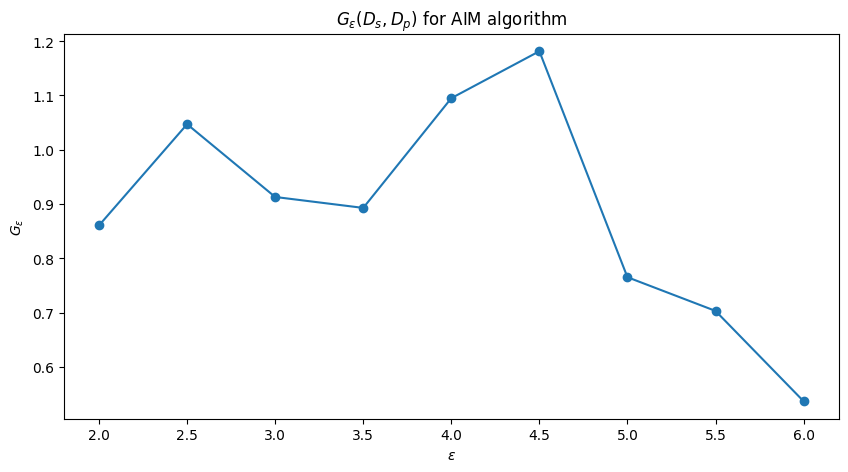

In [ ]:
#Plotting the gepsilon, with key as x and gepsilon as y
plt.figure(figsize=(10,5))
plt.plot([float(key.split('_')[-1]) for key in gepsilon.keys()], gepsilon.values(), 'o-')
plt.title(r'$G_{\epsilon}(D_{s},D_{p})$ for DPCTGAN algorithm')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$G_{\epsilon}$')
plt.show()

In [ ]:
#Save gepsilon
with open('Project/DataSets/Data_Adult/DP_CTGAN_samples/gepsilon.json', 'w') as f:
    json.dump(gepsilon, f)
    f.close()

In [ ]:
#Finding the Gepsilon for the synthetic data generator with non-privacy guarantees
FASTML_samples=pd.read_csv('Project/DataSets/Data_Adult/FASTML_samples.csv',index_col=0)
CTGAN_samples=pd.read_csv('Project/DataSets/Data_Adult/CTGAN_samples.csv',index_col=0)
GaussianCopula_samples=pd.read_csv('Project/DataSets/Data_Adult/GaussianCopula_samples.csv',index_col=0)
TVAE_samples=pd.read_csv('Project/DataSets/Data_Adult/TVAE_samples.csv',index_col=0)
CopulaGAN_samples=pd.read_csv('Project/DataSets/Data_Adult/CopulaGAN_samples.csv',index_col=0)
non_param_Copulas_samples=pd.read_csv('Project/DataSets/Data_Adult/non_param_Copulas_samples.csv',index_col=0)

#Making a dictionary for the synthetic data
data_={'FASTML':FASTML_samples,
       'CTGAN':CTGAN_samples,
       'GaussianCopula':GaussianCopula_samples,
       'TVAE':TVAE_samples,
       'CopulaGAN':CopulaGAN_samples,
       'non_param_Copulas':non_param_Copulas_samples}

#Getting the Gepsilon for the synthetic data
path="Project/DataSets/Data_Adult/Metrics_results/G_epsilon_unprivate"
epsilon_dict=get_Gepsilon_dict(path,data_,Dp, interval_cols, categorical_cols,data_types,alpha=1,beta=1)
# data_=pd.read_csv("Project/DataSets/Data_Adult/CTGAN_samples.csv",index_col=0)
# get_Gepsilon( data_,Dp, interval_cols, categorical_cols,data_types,alpha=1,beta=1)

## Making experiments with pacsynth (even if it has nan rows)

In [ ]:
#Finding the Gepsilon for the synthetic data generator with non-privacy guarantees
pacsynth_samples=pd.read_csv('Project/DataSets/Data_Adult/pacsynth_samples_epsilon3.csv',index_col=0)

#Making a dictionary for the synthetic data
data_pac={'PACSYNTH':pacsynth_samples}

#Getting the Gepsilon for the synthetic data
path="Project/DataSets/Data_Adult/Metrics_results"
epsilon_dict=get_Gepsilon_dict(path,data_pac,Dp, interval_cols, categorical_cols,data_types,alpha=1,beta=1)

## Making experiments with the one-class columns

In [12]:
DPGAN_samples=pd.read_csv('Project/DataSets/Data_Adult/DPGAN_samples/epsilon_1_DPGAN.csv')
#see the unique values of the data 
DPGAN_samples['race'].unique()

array(['White'], dtype=object)